# FINAL PROJECT

### Deaths caused by Cancer

### Project Goal
This project will make attempts at providing analysis on the number of deaths of cancer patients assigned to various hospitals across several states in the US. Exploration and Analysis of these deaths are done on a dataset based on data from a "Dartmouth Atlas report" Dataset from Data World.

Data Sources:

In this project we'll use local excel and json files from our project data repository and an excel file from Data World.

https://data.world/dartmouthatlas/cancer-patients-death/workspace/file?filename=DAP_cancer_events_hosp_2010.xls

***Loading Datasets***

Before loading the datasets, we'll begin by importing the necessary libraries and modules

In [4]:
import  os
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 

In [5]:
pwd = os.getcwd()

In [39]:
#Loading DataSets

def load_dataset():
    """ 
    The mentioned function fetches and loads datasets from various sources to DataFrames
    and returns 3 dataframes from the data sources
    """
    raw_cancer_deaths_2010 = pd.read_excel("DAP_cancer_events_hosp_2010.xls")
    raw_cancer_deaths_2011 = pd.read_json("DAP_cancer_events_hosp_2011.json")
    raw_cancer_deaths_2012 = pd.read_excel('https://query.data.world/s/tjvwl5wt3bjj422n6tiq5homwojcrj')
    
    return raw_cancer_deaths_2010, raw_cancer_deaths_2011, raw_cancer_deaths_2012

In [7]:
# Call the load_dataset function
raw_cancer_deaths_2010, raw_cancer_deaths_2011, raw_cancer_deaths_2012= load_dataset()

In [8]:
cancer_deaths_2010 = raw_cancer_deaths_2010.copy()
cancer_deaths_2011 = raw_cancer_deaths_2011.copy()
cancer_deaths_2012 = raw_cancer_deaths_2012.copy()

Performing some basic exploration to have a size and shape of the data we're working with

In [9]:
cancer_deaths_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 35 columns):
 #   Column                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                      --------------  -----  
 0   Provider ID                                                                                                 829 non-null    float64
 1   Hospital Name                                                                                               829 non-null    object 
 2   City                                                                                                        829 non-null    object 
 3   State                                                                                                       829 non-null    object 
 4   Number of deaths among cancer patients assigned to hospital (2012)  

In [10]:
cancer_deaths_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 38 columns):
 #   Column                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                      --------------  -----  
 0   Provider ID                                                                                                 826 non-null    float64
 1   Hospital Name                                                                                               826 non-null    object 
 2   City                                                                                                        825 non-null    object 
 3   State                                                                                                       825 non-null    object 
 4   Number of deaths among cancer patients assigned to hospital (2010)  

In [11]:
cancer_deaths_2011.shape

(839, 15)

In [12]:
cancer_deaths_2012.shape

(830, 35)


Looking at the 2010 and 2012 datasets, there exists unncessary columns in respective datasets that needs to be drop as part of the cleaning process.


In [42]:
# our columns of Interest

columns_of_interest_2010 = ['Provider ID', 
                            'Hospital Name', 
                            'City', 
                            'State', 
                            'Number of deaths among cancer patients assigned to hospital (2010)',
                            'Percent of cancer patients dying in hospital (2010)', 
                            'Percent of cancer patients admitted to hospital during the last month of life (2010 deaths)',
                            'Hospital days per cancer patient during the last month of life (2010 deaths)', 
                            'Percent of cancer patients admitted to intensive care during the last month of life (2010 deaths)',
                            'ICU days per cancer patient during the last month of life (2010 deaths)', 
                            'Percent of cancer patients receiving life-sustaining treatment during the last month of life (2010 deaths)',
                            'Percent of cancer patients receiving chemotherapy during the last two weeks of life (2010 deaths)',  
                            'Percent of cancer patients enrolled in hospice during the last month of life (2010 deaths)',
                            'Hospice days per cancer patient during the last month of life (2010 deaths)', 
                            'Percent of cancer patients enrolled in hospice during the last three days of life (2010 deaths)',
                            'Percent of cancer patients seeing ten or more physicians during the last six months of life (2010 deaths)']
                           

In [41]:
# Our columns of Interest

columns_of_interest_2012 = ['Provider ID', 
                            'Hospital Name', 
                            'City', 
                            'State',
                            'Number of deaths among cancer patients assigned to hospital (2012)',
                            'Percent of cancer patients dying in hospital (2012)', 
                            'Percent of cancer patients admitted to hospital during the last month of life (2012 deaths)',
                            'Hospital days per cancer patient during the last month of life (2012 deaths)',  
                            'Percent of cancer patients admitted to intensive care during the last month of life (2012 deaths)',
                            'ICU days per cancer patient during the last month of life (2012 deaths)',  
                            'Percent of cancer patients receiving life-sustaining treatment during the last month of life (2012 deaths)',
                            'Percent of cancer patients enrolled in hospice during the last month of life (2012 deaths)', 
                            'Hospice days per cancer patient during the last month of life (2012 deaths)',
                            'Percent of cancer patients enrolled in hospice during the last three days of life (2012 deaths)',  
                            'Percent of cancer patients seeing ten or more physicians during the last six months of life (2012 deaths)']                                                        
                

In [43]:
def drop_columns(df, columns_of_interest):
    """
    The drop_column function takes a list of columns of interest as a parameter and returns a new DF without unnecessary columns
    """ 
    df = df[columns_of_interest]

    return df

In [44]:
# Apply the drop_columns function to remove the columns we do not need

cancer_deaths_2010 = drop_columns(cancer_deaths_2010, columns_of_interest_2010)
cancer_deaths_2012 = drop_columns(cancer_deaths_2012, columns_of_interest_2012)

In [45]:
def dropnan(df):
    """ 
    The dropna function takes in one parameter and removes all NaN values
    It then returns the DF without NAN values
    """ 
    return df.dropna()

In [46]:
# Apply the dropnan to the DataFrames to remove NaN values from out DFs

cancer_deaths_2010_clean = dropnan(cancer_deaths_2010)
cancer_deaths_2011_clean = dropnan(cancer_deaths_2011)
cancer_deaths_2012_clean = dropnan(cancer_deaths_2012)


After cleaning the dataframes, we can now begin high level operations on the DF such as merging the 3 DFs but applying a filter to select only the needed columns from the DFs.

In [47]:
# Number of deaths of cancer patients comparison over the 3 years

ccc = cancer_deaths_2010_clean.iloc[:, :5].merge(cancer_deaths_2011_clean.filter(items=["Provider ID", "Number of deaths among cancer patients assigned to hospital (2011)"]),
                                    on='Provider ID').merge(cancer_deaths_2012_clean.filter(items=("Provider ID", "Number of deaths among cancer patients assigned to hospital (2012)")), 
                                    on='Provider ID')
ccc.rename(columns={"Number of deaths among cancer patients assigned to hospital (2010)": "Deaths (2010)", 
                    "Number of deaths among cancer patients assigned to hospital (2011)": "Deaths (2011)",
                    "Number of deaths among cancer patients assigned to hospital (2012)": "Deaths (2012)"}, inplace=True)
                    

In [20]:
ccc

,Provider ID,Hospital Name,City,State,Deaths (2010),Deaths (2011),Deaths (2012)
0,10039.0,Huntsville Hospital,Huntsville,AL,331.0,323,318.0
1,10139.0,Brookwood Medical Center,Birmingham,AL,132.0,124,124.0
2,30064.0,University Medical Center-Tucson,Tucson,AZ,131.0,133,144.0
3,30087.0,Scottsdale Healthcare Shea,Scottsdale,AZ,178.0,155,159.0
4,30088.0,Banner Baywood Medical Center,Mesa,AZ,163.0,162,178.0
...,...,...,...,...,...,...,...
172,490063.0,Inova Fairfax Hospital,Falls Church,VA,266.0,244,273.0
173,490112.0,CJW Medical Center,Richmond,VA,233.0,215,228.0
174,500079.0,Multicare Good Samaritan Hosp,Puyallup,WA,128.0,114,124.0
175,520138.0,Aurora St. Luke's Medical Center,Milwaukee,WI,354.0,303,270.0


*** 
Pivoting Tables
***

In [23]:
pivot_table_1 = np.round(pd.pivot_table(ccc, 
                                        index=['State'], 
                                        aggfunc={"Deaths (2010)":'count', "Deaths (2011)":'count', "Deaths (2012)": 'count'}), 2)

In [24]:
pivot_table_1.sort_values(by=['Deaths (2010)', 'Deaths (2011)', 'Deaths (2011)'], inplace=True, ascending=False)
pivot_table_1.head(10)

,Deaths (2010),Deaths (2011),Deaths (2012)
State,,,
FL,24,24,24
TX,17,17,17
NJ,15,15,15
CA,12,12,12
IL,10,10,10
NC,9,9,9
MI,8,8,8
NY,6,6,6
OH,6,6,6


In [25]:
pivot_table_2 = np.round(pd.pivot_table(ccc, index=(['Hospital Name', 'State']), aggfunc={"Deaths (2012)": 'max'}), 2)
pivot_table_2


,,Deaths (2012)
Hospital Name,State,
Abington Memorial Hospital,PA,208.0
Advocate Christ Medical Center,IL,287.0
Advocate Lutheran General Hosp,IL,244.0
Athens Regional Medical Center,GA,185.0
AtlantiCare Regional Med Ctr,NJ,171.0
...,...,...
Valley Hospital,NJ,313.0
Venice Regional Medical Center,FL,180.0
Virtua West Jersey Hosp-Voorhees,NJ,226.0


In [48]:
# Let's look at the leading 10 health facilities with the most number of deaths
# of cancer patients assigned to them in 2012

pivot_table_2.sort_values("Deaths (2012)", inplace=True, ascending=False)
hosp_with_most_deaths = pd.DataFrame(pivot_table_2.head(10))
hosp_with_most_deaths


,,Deaths (2012)
Hospital Name,State,
Mem Sloan-Kettering Cancer Ctr,NY,763.0
U of TX M.D. Anderson Cancer Ctr,TX,685.0
Florida Hospital Orlando,FL,590.0
New York-Presbyterian Hospital,NY,589.0
Dana-Farber Cancer Institute,MA,494.0
Yale-New Haven Hospital,CT,469.0
Barnes-Jewish Hospital,MO,444.0
North Shore Univ Hosp-Manhasset,NY,434.0
Christiana Care Health System,DE,431.0


In [27]:
# Also we can look at the facilities with the least number of deaths of cancer patients
# assigned to them in 2012

pivot_table_2.sort_values("Deaths (2012)", inplace=True, ascending=True)
hosp_with_least_deaths = pd.DataFrame(pivot_table_2.head(10))
hosp_with_least_deaths

,,Deaths (2012)
Hospital Name,State,
Crozer-Chester Medical Center,PA,87.0
Good Samaritan Hospital-Dayton,OH,91.0
St. Rose Dominican-Siena,NV,105.0
Botsford Hospital,MI,108.0
City of Hope-Helford Hospital,CA,109.0
Memorial Regional Hospital,FL,110.0
Lawrence & Memorial Hospital,CT,111.0
St. David's South Austin Med Ctr,TX,113.0
Kettering Medical Center,OH,120.0


***
Visualization of Data

It helps us to obtain meaning insights from our data, further manipulation and visualization will be performed on the data. With these visualizations, we can draw conclusive deductions related to the dataset we're working on.
***

In [50]:
def bar_plot(df, x_axis, y_axis):
    """ 
    The bar_plot function takes in the DF and the axis of interest as parameters and returns a countplot
    """ 
    return sns.barplot(data=df, x=x_axis, y=y_axis)
    

In [51]:
# Hospitals leading with number of deaths of cancer patients over the 3 years

highest_deaths = ccc.sort_values(['Deaths (2010)', 'Deaths (2011)', 'Deaths (2012)'], ascending=False).head(20)
highest_deaths


,Provider ID,Hospital Name,City,State,Deaths (2010),Deaths (2011),Deaths (2012)
115,330154.0,Mem Sloan-Kettering Cancer Ctr,New York,NY,741.0,749,763.0
158,450076.0,U of TX M.D. Anderson Cancer Ctr,Houston,TX,643.0,636,685.0
28,100007.0,Florida Hospital Orlando,Orlando,FL,616.0,534,590.0
113,330101.0,New York-Presbyterian Hospital,New York,NY,515.0,534,589.0
114,330106.0,North Shore Univ Hosp-Manhasset,Manhasset,NY,460.0,425,434.0
86,230130.0,Beaumont Hospital-Royal Oak,Royal Oak,MI,458.0,417,378.0
166,450388.0,Methodist Hospital-San Antonio,San Antonio,TX,441.0,470,419.0
26,80001.0,Christiana Care Health System,Newark,DE,434.0,502,431.0
94,260032.0,Barnes-Jewish Hospital,St. Louis,MO,432.0,452,444.0
80,220162.0,Dana-Farber Cancer Institute,Boston,MA,407.0,426,494.0


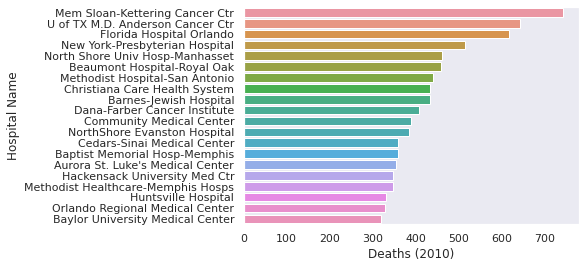

In [52]:
plot1 = bar_plot(highest_deaths, highest_deaths['Deaths (2010)'], highest_deaths['Hospital Name'])

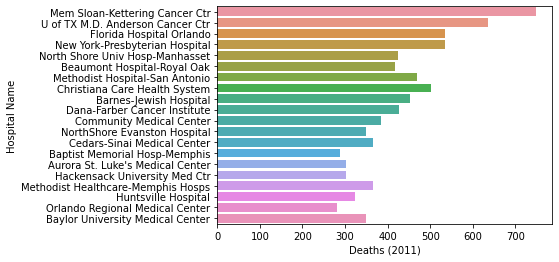

In [31]:
plot2 = bar_plot(highest_deaths, highest_deaths['Deaths (2011)'], highest_deaths['Hospital Name'])


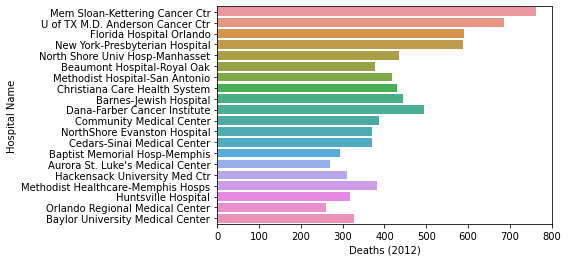

In [32]:
plot3 = bar_plot(highest_deaths, highest_deaths['Deaths (2012)'], highest_deaths['Hospital Name'])

### Insights from the above plots

With the visualizations above, it is noted that Mem Sloan-Kettering Cancer Ctr in New York and U of TX M.D. Anderson Cancer Ctr in Texas had registered the most number of deaths of cancer patients assigned to the respective hospitals over the 3 year period.






Text(0.5, 1.0, 'State comparison on the Number of deaths of Cancer Patients')

<Figure size 3240x2160 with 0 Axes>

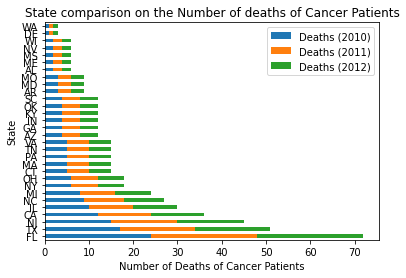

In [33]:
plt.figure(figsize=(45, 30))
plot4 = pivot_table_1 .plot(kind='barh', stacked=True)
plot4.set_xlabel('Number of Deaths of Cancer Patients')
plot4.set_title('State comparison on the Number of deaths of Cancer Patients')

The stacked bar plot above indicates that Delaware recorded the most number of deaths of cancer patients assigned to hospitals in that state closely followed by New York and Massachusetts a distant third.






In [34]:
icu_days = cancer_deaths_2010_clean.iloc[:, [0, 1, 2, 3, 4, 9]].merge(cancer_deaths_2011_clean.iloc[:, [0, 4, 9]], 
                                        on='Provider ID').merge(cancer_deaths_2012_clean.iloc[:, [0, 4, 9]], on='Provider ID')

icu_days

,Provider ID,Hospital Name,City,State,Number of deaths among cancer patients assigned to hospital (2010),ICU days per cancer patient during the last month of life (2010 deaths),Number of deaths among cancer patients assigned to hospital (2011),ICU days per cancer patient during the last month of life (2011 deaths),Number of deaths among cancer patients assigned to hospital (2012),ICU days per cancer patient during the last month of life (2012 deaths)
0,10039.0,Huntsville Hospital,Huntsville,AL,331.0,4.50834,323,4.2,318.0,5.05733
1,10139.0,Brookwood Medical Center,Birmingham,AL,132.0,0.987866,124,1.6,124.0,1.22401
2,30064.0,University Medical Center-Tucson,Tucson,AZ,131.0,2.41331,133,2.7,144.0,2.2233
3,30087.0,Scottsdale Healthcare Shea,Scottsdale,AZ,178.0,1.49855,155,1.4,159.0,2.23307
4,30088.0,Banner Baywood Medical Center,Mesa,AZ,163.0,1.92532,162,2.7,178.0,1.94955
...,...,...,...,...,...,...,...,...,...,...
172,490063.0,Inova Fairfax Hospital,Falls Church,VA,266.0,2.58387,244,2.1,273.0,2.20379
173,490112.0,CJW Medical Center,Richmond,VA,233.0,1.80301,215,2.1,228.0,2.15609
174,500079.0,Multicare Good Samaritan Hosp,Puyallup,WA,128.0,0.775305,114,1.1,124.0,1.07229
175,520138.0,Aurora St. Luke's Medical Center,Milwaukee,WI,354.0,1.25879,303,1.2,270.0,1.11518


In [35]:
icu_days_sort = icu_days.sort_values('Number of deaths among cancer patients assigned to hospital (2012)')['ICU days per cancer patient during the last month of life (2012 deaths)']

In [36]:
def hist_plot(df):
    """ 
    Takes in the DF as a parameter and returns a histplot of the df
    """ 
    sns.set_theme(style="dark")
    return sns.histplot(df,
            palette="dark",
            edgecolor=".3",
            linewidth=.5,
            bins=10)

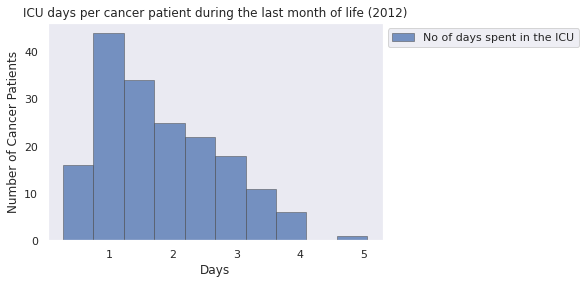

In [37]:
plot5 = hist_plot(icu_days_sort)
plot5.set_title("ICU days per cancer patient during the last month of life (2012)")
plot5.set_xlabel("Days")
plot5.set_ylabel("Number of Cancer Patients")
plot5.legend(labels = ['No of days spent in the ICU'], loc = 2, bbox_to_anchor = (1, 1))

It can be deduced that a high percentage of cancer patients spent a little over 0.5 to close to 2.5 days in the last month of their life in the ICU before the ultimate deaths in the year 2012 while those a very low percentage of those patients spent more than 4 days in the last month of their life in the ICU.

**SUMMARY**


The project analysis the deaths of various patients caused due to cancer. The project takes in data sets from various sources, cleaned and merged into a single data frame. 
The project yields us information regarding various hospitals and their number of deaths and also the number of days the patient was kept in the ICU.
